<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/ICA_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting Mixed Signals? Use ICA.**
(Fayyaz Minhas)

A Guide to Understanding PCA vs. ICA and Their Application to the Cocktail Party Problem

---

## **Introduction**
Imagine you’re at a lively cocktail party 🎉 with multiple people talking simultaneously. You’re trying to listen to two interesting conversations at once, but all you hear is a confusing blend of voices. **This is the problem ICA (Independent Component Analysis) is designed to solve**! ICA helps to **unmix** signals and extract the original independent components—just like separating overlapping voices at a party.

But before we dive into ICA, let’s first understand **why PCA (Principal Component Analysis) falls short in this task** and how ICA is the superior approach when attempting to recover **independent, mixed signals**.

---

## **1. What is PCA (Principal Component Analysis)?**
PCA is a technique used to **reduce the dimensionality** of data by finding directions (or axes) that maximize the **variance** of the data while ensuring that the components are **uncorrelated and orthogonal**.

### **Representation in PCA:**
- Given a dataset of observations $ \mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_n]^\top $ with $d$ dimensions, PCA finds **principal components** by solving:
  \[
  \mathbf{X}^\top \mathbf{X} \mathbf{w} = \lambda \mathbf{w}
  \]
  where:
  - $\mathbf{w}$ is the direction of the principal component (eigenvector),
  - $\lambda$ is the amount of variance captured by that component (eigenvalue).

- The **projection of a data point** $\mathbf{x}_i$ onto a principal component is:
  \[
  z_i = \mathbf{w}^\top \mathbf{x}_i
  \]
  where $z_i$ is the transformed feature along the principal component direction.

### **Evaluation in PCA:**
The objective function in PCA is to **maximize the variance** of the projections:
$$
\max_{\mathbf{w}} \ \text{Var}(\mathbf{w}^\top \mathbf{X}) \quad \text{subject to} \quad \|\mathbf{w}\| = 1
$$

---

## **2. The Limitation of PCA**
While PCA decorrelates the data by finding **orthogonal components**, it does **not guarantee statistical independence** between them. This limitation makes it unsuitable for problems where the goal is to **separate independent signals**, such as the **cocktail party problem**.

- **Uncorrelatedness** only means that the covariance between variables is zero, but they can still be dependent through **higher-order relationships**.
- For example, overlapping voices that are independent will not be correctly separated using PCA alone.

---

## **3. What is ICA (Independent Component Analysis)?**
ICA is a method for separating a multivariate signal into **statistically independent components**. Unlike PCA, which finds orthogonal directions of maximum variance, ICA finds **non-orthogonal directions** that correspond to **statistically independent sources**.

### **Representation in ICA:**
ICA assumes that the observed signals are a **linear mixture** of independent sources:
$$
\mathbf{X} = \mathbf{A} \mathbf{S}
$$
where:
- $\mathbf{X}$ is the observed data (e.g., recordings from microphones),
- $\mathbf{A}$ is the **mixing matrix**,
- $\mathbf{S}$ contains the **independent components** we want to recover.

The goal of ICA is to find an **unmixing matrix** $\mathbf{W}$ such that:
\[
\mathbf{S} = \mathbf{W} \mathbf{X}
\]

---

## **4. Evaluation in ICA: Minimizing Mutual Information**
The objective of ICA is to make the components **statistically independent**. This is achieved by **minimizing the mutual information** $I(s_1, s_2, \dots, s_d)$ between the components:
$$
\min_{\mathbf{W}} \ I(s_1, s_2, \dots, s_d)
$$
Mutual information measures the amount of dependency between variables. If the mutual information is zero, the variables are **statistically independent**:
$$
I(s_1, s_2) = 0 \quad \implies \quad \text{Statistically Independent Components}
$$

### **How ICA Minimizes Mutual Information:**
- Directly minimizing mutual information is often computationally difficult, so ICA algorithms typically **maximize non-Gaussianity** as a proxy.
- According to the **Central Limit Theorem**, the sum of independent variables tends to be Gaussian. Therefore, by finding components that are **maximally non-Gaussian**, we can identify the independent sources.

**Objective functions for maximizing non-Gaussianity include:**
- **Negentropy:**  
  $$
  J(y) = H(y_{\text{Gaussian}}) - H(y)
  $$  
  where $H$ is the entropy of the variable.
- **Kurtosis:**  
  $$
  \text{Kurtosis}(y) = \mathbb{E}[y^4] - 3(\mathbb{E}[y^2])^2
  $$
  which measures the "tailedness" of a distribution.

For more details, check out the [scikit-learn ICA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html).

---

## **5. The Cocktail Party Problem: How ICA Separates Voices**
Imagine you’re at a party where **two people are talking simultaneously** and you have **two microphones recording their conversations**. The microphones capture **linear mixtures** of the two voices, and the task is to **separate the original voice signals**.

### **Step 1: Mixing Process**
- The observed signals $\mathbf{X} = [x_1(t), x_2(t)]^\top$ are linear mixtures of the independent sources $s_1(t)$ and $s_2(t)$:
  $$
  \mathbf{X} = \mathbf{A} \mathbf{S}
  $$
  Each microphone captures a combination of the two voices.

### **Step 2: Applying ICA**
- ICA estimates the unmixing matrix $\mathbf{W}$ such that:
  $$
  \mathbf{S} = \mathbf{W} \mathbf{X}
  $$
  The result is two separated signals $s_1(t)$ and $s_2(t)$, which correspond to the voices of the two speakers.

---

## **6. Differences Between PCA and ICA**

| **Aspect**                    | **PCA**                                              | **ICA**                                                  |
|------------------------------|------------------------------------------------------|----------------------------------------------------------|
| **Objective**                 | Maximize variance and decorrelate components         | Minimize mutual information and achieve independence     |
| **Orthogonality**             | Principal components are orthogonal                  | Independent components are not necessarily orthogonal    |
| **Statistical Relationship**  | Components are uncorrelated                         | Components are statistically independent                 |
| **Mixing Assumption**         | Assumes data is decorrelated, but may still be mixed | Assumes data is a mixture of independent signals         |
| **Real-World Use Cases**      | Dimensionality reduction, noise filtering           | Signal separation, blind source separation, audio mixing |

---

## **7. Links to Relevant Documentation**
- [PCA Documentation in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)  
- [FastICA Documentation in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)

---

## **8. Key Takeaways**
- **PCA** decorrelates data and finds orthogonal directions of maximum variance but is insufficient for separating independent sources.
- **ICA** focuses on minimizing mutual information, leading to the separation of statistically independent components.
- The **cocktail party problem** demonstrates how ICA can be used to unmix overlapping signals effectively.

Let’s now run the Python code to see ICA and PCA in action!


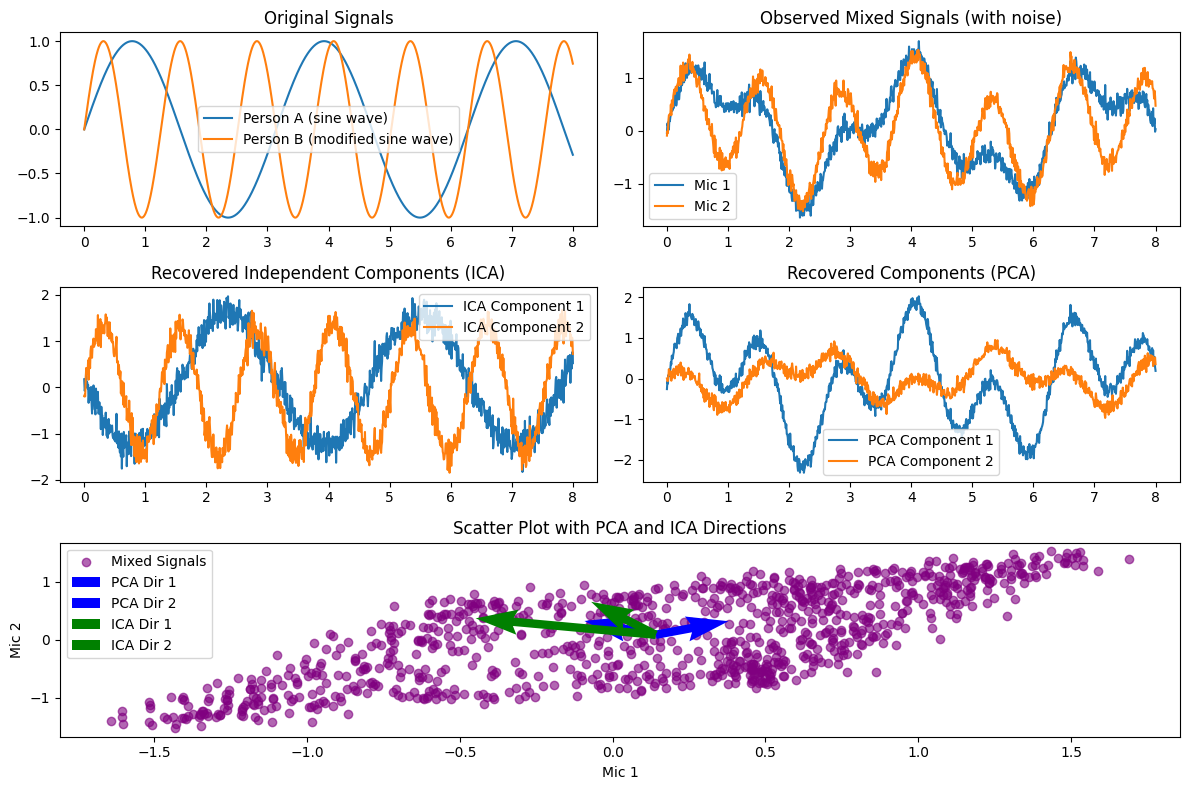

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA

# Step 1: Generate synthetic signals
time = np.linspace(0, 8, 1000)

# Person A: Sinusoidal wave
s1 = np.sin(2 * time)

# Person B: Modified signal (sinusoidal)
s2 = np.sin(5 * time)

# Stack signals (2 signals, 1000 time samples)
S = np.c_[s1, s2]

# Step 2: Mix the signals using a random mixing matrix
A = np.array([[1, 0.5], [0.4, 1]])  # Mixing matrix
X = np.dot(S, A.T)  # Mixed signals (microphone recordings)

# Add Gaussian noise to the mixed signals
noise = 0.1 * np.random.randn(*X.shape)
X_noisy = X + noise

# Step 3: Apply FastICA to recover independent components
ica = FastICA(n_components=2)
S_ica_recovered = ica.fit_transform(X_noisy)  # Recovered signals using ICA

# Step 4: Apply PCA to recover components
pca = PCA(n_components=2)
S_pca_recovered = pca.fit_transform(X_noisy)  # Recovered signals using PCA

# Step 5: Plot the results
plt.figure(figsize=(12, 8))

# Original signals
plt.subplot(3, 2, 1)
plt.title('Original Signals')
plt.plot(time, S[:, 0], label='Person A (sine wave)')
plt.plot(time, S[:, 1], label='Person B (modified sine wave)')
plt.legend()

# Mixed signals with noise
plt.subplot(3, 2, 2)
plt.title('Observed Mixed Signals (with noise)')
plt.plot(time, X_noisy[:, 0], label='Mic 1')
plt.plot(time, X_noisy[:, 1], label='Mic 2')
plt.legend()

# Recovered components using ICA
plt.subplot(3, 2, 3)
plt.title('Recovered Independent Components (ICA)')
plt.plot(time, S_ica_recovered[:, 0], label='ICA Component 1')
plt.plot(time, S_ica_recovered[:, 1], label='ICA Component 2')
plt.legend()

# Recovered components using PCA
plt.subplot(3, 2, 4)
plt.title('Recovered Components (PCA)')
plt.plot(time, S_pca_recovered[:, 0], label='PCA Component 1')
plt.plot(time, S_pca_recovered[:, 1], label='PCA Component 2')
plt.legend()

# Scatter plot of mixed signals with PCA and ICA directions
plt.subplot(3, 2, (5, 6))
plt.title('Scatter Plot with PCA and ICA Directions')
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], alpha=0.6, color='purple', label='Mixed Signals')
origin = np.mean(X_noisy, axis=0)

# Plot PCA direction vectors
for i in range(2):
    plt.quiver(*origin, *pca.components_.T[:, i], color='blue', scale=3, scale_units='xy', angles='xy', label=f'PCA Dir {i+1}')

# Plot ICA direction vectors
for i in range(2):
    plt.quiver(*origin, *ica.components_.T[:, i], color='green', scale=3, scale_units='xy', angles='xy', label=f'ICA Dir {i+1}')

plt.xlabel('Mic 1')
plt.ylabel('Mic 2')
plt.legend()

plt.tight_layout()
plt.show()
